<h1 align="center"><font size="6">Data Analytics Project</font></h1>

<h1 align="center"><font size="5">Classification with Python</font></h1>

In this notebook, I predict which customers are more likely to respond positively to a bank marketing call by setting up a regular savings deposit or subscribing the term “made_deposit”.

Three classification algorithms will be developed in order to predict the target variable. Logistic Regression, Decision Tree and Multi-Layer Perceptron (MLP). 

The analysis of the project includes Data Summary, Data Preparation, Modelling, Results and Errors using Evaluation Metrics, Confusion Matrices and ROC Curve.

Import libraries

In [4]:
import pandas as pd
import numpy as np
from scipy import stats

#import seaborn
import seaborn as sns

Read the data using pandas 

In [5]:
df = pd.read_csv("/Users/stella/Google Drive/UNISTI/MSc Data Science for Business/Data Analytics/Project/bank-data.csv")

In [6]:
# A glance in the dataset

df.head()

,accountID,town,country,age,job,married,education,defaulted?,current_balance,housing,...,last_contact,cc_tr,last_contact_day,last_contact_month,last_contact_duration_s,campaign,days_since_last_contact,previous,poutcome,made_deposit
0,24634684,Crawley,UK,39,management,married,tertiary,no,-190,no,...,unknown,1,11,jun,893,8,-1,0,unknown,yes
1,80795929,Southend-on-Sea,UK,53,housemaid,married,primary,no,362,no,...,cellular,1,28,jul,1169,2,-1,0,unknown,yes
2,30786087,Gillingham,UK,79,retired,divorced,primary,no,2787,no,...,telephone,5,13,jul,617,1,377,1,success,yes
3,38925327,Gateshead,UK,43,services,single,secondary,no,550,yes,...,cellular,4,13,may,107,2,-1,0,unknown,no
4,30560733,Eastbourne,UK,35,technician,single,secondary,no,344,no,...,cellular,2,27,aug,519,16,-1,0,unknown,yes


In [10]:
# Shape of the dataset (rows and columns)

df.shape

(8000, 21)

In [ ]:
df.columns

In [11]:
# The types of the variables

df.dtypes

accountID                   int64
town                       object
country                    object
age                         int64
job                        object
married                    object
education                  object
defaulted?                 object
current_balance             int64
housing                    object
has_loan                   object
last_contact               object
cc_tr                       int64
last_contact_day            int64
last_contact_month         object
last_contact_duration_s     int64
campaign                    int64
days_since_last_contact     int64
previous                    int64
poutcome                   object
made_deposit               object
dtype: object

### Null or missing values in the dataset

In [12]:
missing_data = df.isnull()
missing_data.head(5)

,accountID,town,country,age,job,married,education,defaulted?,current_balance,housing,...,last_contact,cc_tr,last_contact_day,last_contact_month,last_contact_duration_s,campaign,days_since_last_contact,previous,poutcome,made_deposit
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [13]:
for column in missing_data.columns.values.tolist():
    print(column)
    print (missing_data[column].value_counts())
    print("")   

accountID
False    8000
Name: accountID, dtype: int64

town
False    8000
Name: town, dtype: int64

country
False    8000
Name: country, dtype: int64

age
False    8000
Name: age, dtype: int64

job
False    8000
Name: job, dtype: int64

married
False    8000
Name: married, dtype: int64

education
False    8000
Name: education, dtype: int64

defaulted?
False    8000
Name: defaulted?, dtype: int64

current_balance
False    8000
Name: current_balance, dtype: int64

housing
False    8000
Name: housing, dtype: int64

has_loan
False    8000
Name: has_loan, dtype: int64

last_contact
False    8000
Name: last_contact, dtype: int64

cc_tr
False    8000
Name: cc_tr, dtype: int64

last_contact_day
False    8000
Name: last_contact_day, dtype: int64

last_contact_month
False    8000
Name: last_contact_month, dtype: int64

last_contact_duration_s
False    8000
Name: last_contact_duration_s, dtype: int64

campaign
False    8000
Name: campaign, dtype: int64

days_since_last_contact
False    8000
Name:

Limiting floats to three decimal points

In [14]:
pd.set_option('display.float_format', lambda x: '%.3f' % x)

Descriptive Statistics of the numerical variables

In [15]:
df.describe()

,accountID,age,current_balance,cc_tr,last_contact_day,last_contact_duration_s,campaign,days_since_last_contact,previous
count,8000.000,8000.000,8000.000,8000.000,8000.000,8000.000,8000.000,8000.000,8000.000
mean,55407459.576,41.212,1516.521,3.011,15.709,373.484,2.497,51.573,0.840
std,25961372.817,11.973,3168.518,1.420,8.433,349.518,2.770,109.155,2.371
min,10000398.000,18.000,-3058.000,1.000,1.000,-60.000,1.000,-1.000,0.000
25%,33058255.500,32.000,120.000,2.000,8.000,139.000,1.000,-1.000,0.000
50%,55587795.000,39.000,545.500,3.000,15.000,256.000,2.000,-1.000,0.000
75%,77690442.500,49.000,1694.000,4.000,22.000,502.250,3.000,33.250,1.000
max,99995994.000,93.000,81204.000,5.000,31.000,3881.000,63.000,854.000,58.000


Correlation Matrix of all numerical variables

In [16]:
df.corr()

,accountID,age,current_balance,cc_tr,last_contact_day,last_contact_duration_s,campaign,days_since_last_contact,previous
accountID,1.000,0.005,0.017,0.006,0.013,0.013,-0.006,-0.010,-0.008
age,0.005,1.000,0.118,0.006,-0.002,0.006,-0.016,0.007,0.022
current_balance,0.017,0.118,1.000,0.028,0.018,0.022,-0.010,0.024,0.033
cc_tr,0.006,0.006,0.028,1.000,0.007,0.006,-0.010,-0.013,-0.018
last_contact_day,0.013,-0.002,0.018,0.007,1.000,-0.012,0.135,-0.071,-0.056
last_contact_duration_s,0.013,0.006,0.022,0.006,-0.012,1.000,-0.046,-0.033,-0.023
campaign,-0.006,-0.016,-0.010,-0.010,0.135,-0.046,1.000,-0.102,-0.045
days_since_last_contact,-0.010,0.007,0.024,-0.013,-0.071,-0.033,-0.102,1.000,0.508
previous,-0.008,0.022,0.033,-0.018,-0.056,-0.023,-0.045,0.508,1.000


In [ ]:
# The independent variable "made_deposit" : yes or no (binary)

# How many of each class is found in the data set

df['made_deposit'].value_counts()

In [ ]:
df.groupby('made_deposit').mean()

## Data Visualisation 

### Numerical Variables

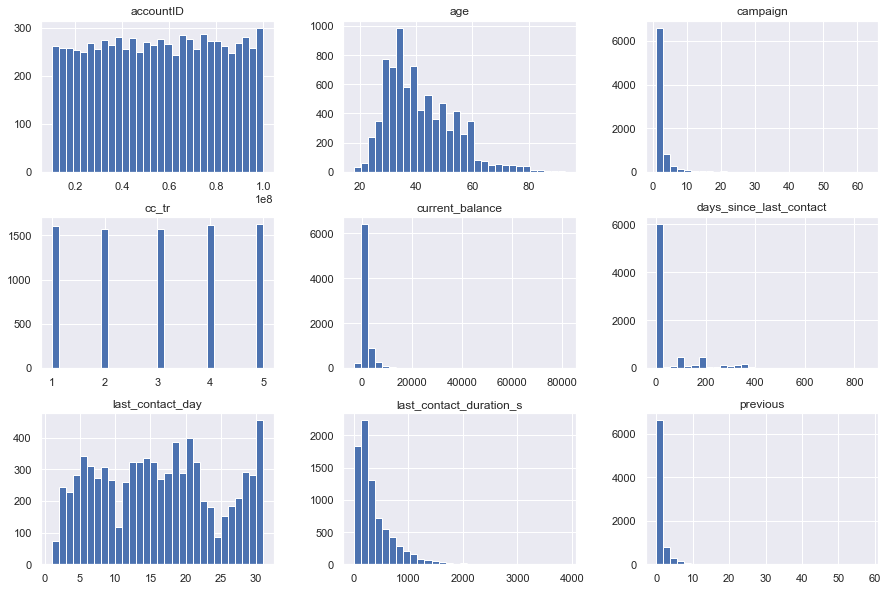

In [81]:
#import matplotlib library
%matplotlib inline
import matplotlib.pyplot as plt


# Histogram for each numerical attribute
df.hist(bins=30, figsize=(15,10))
plt.show()

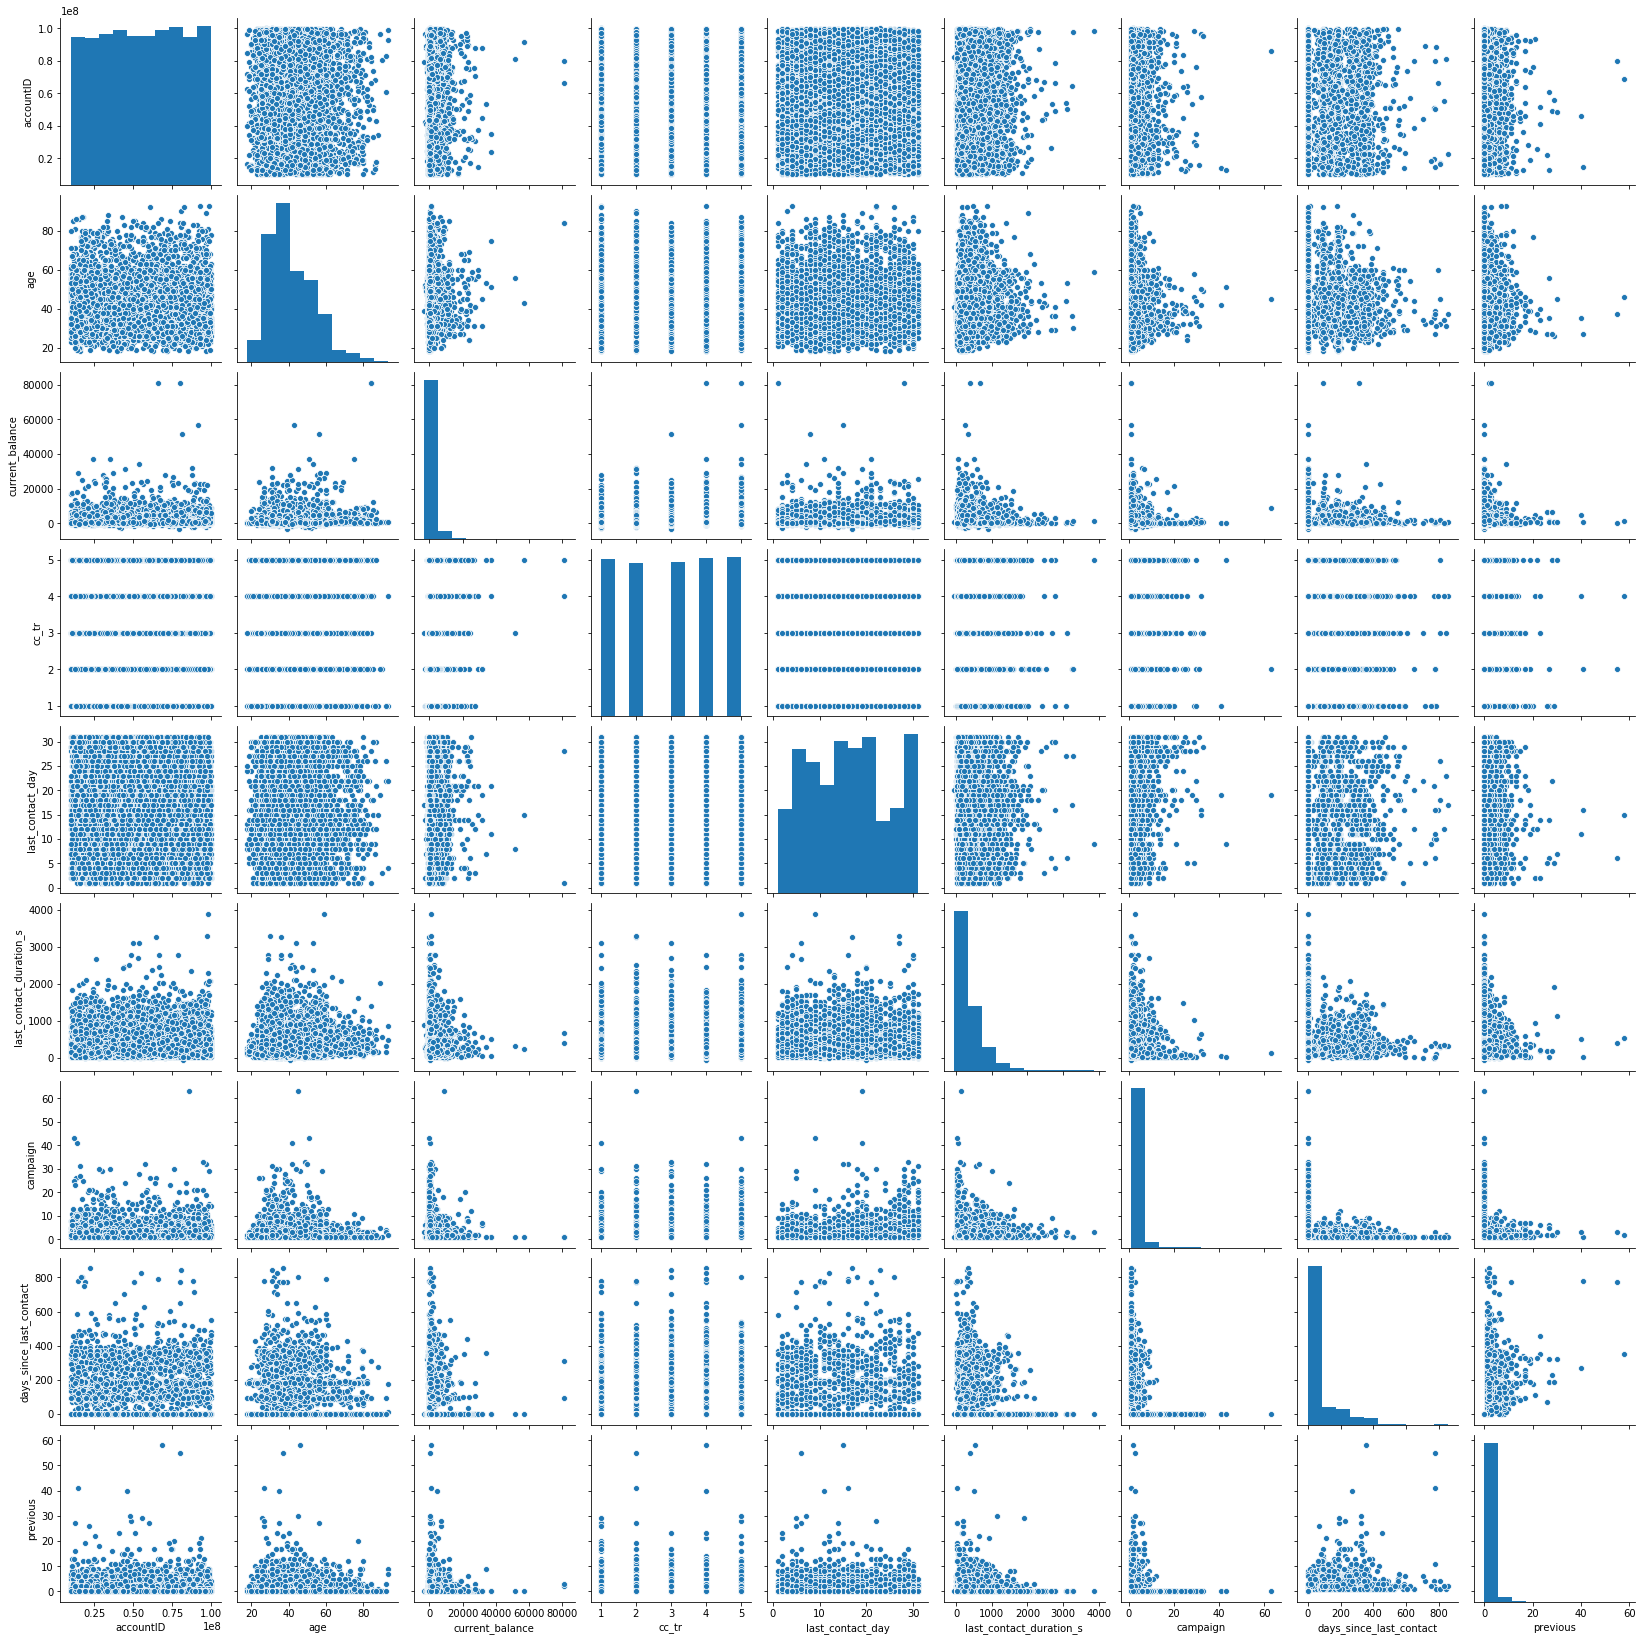

In [21]:
# Pairs plot

sns.pairplot(df);

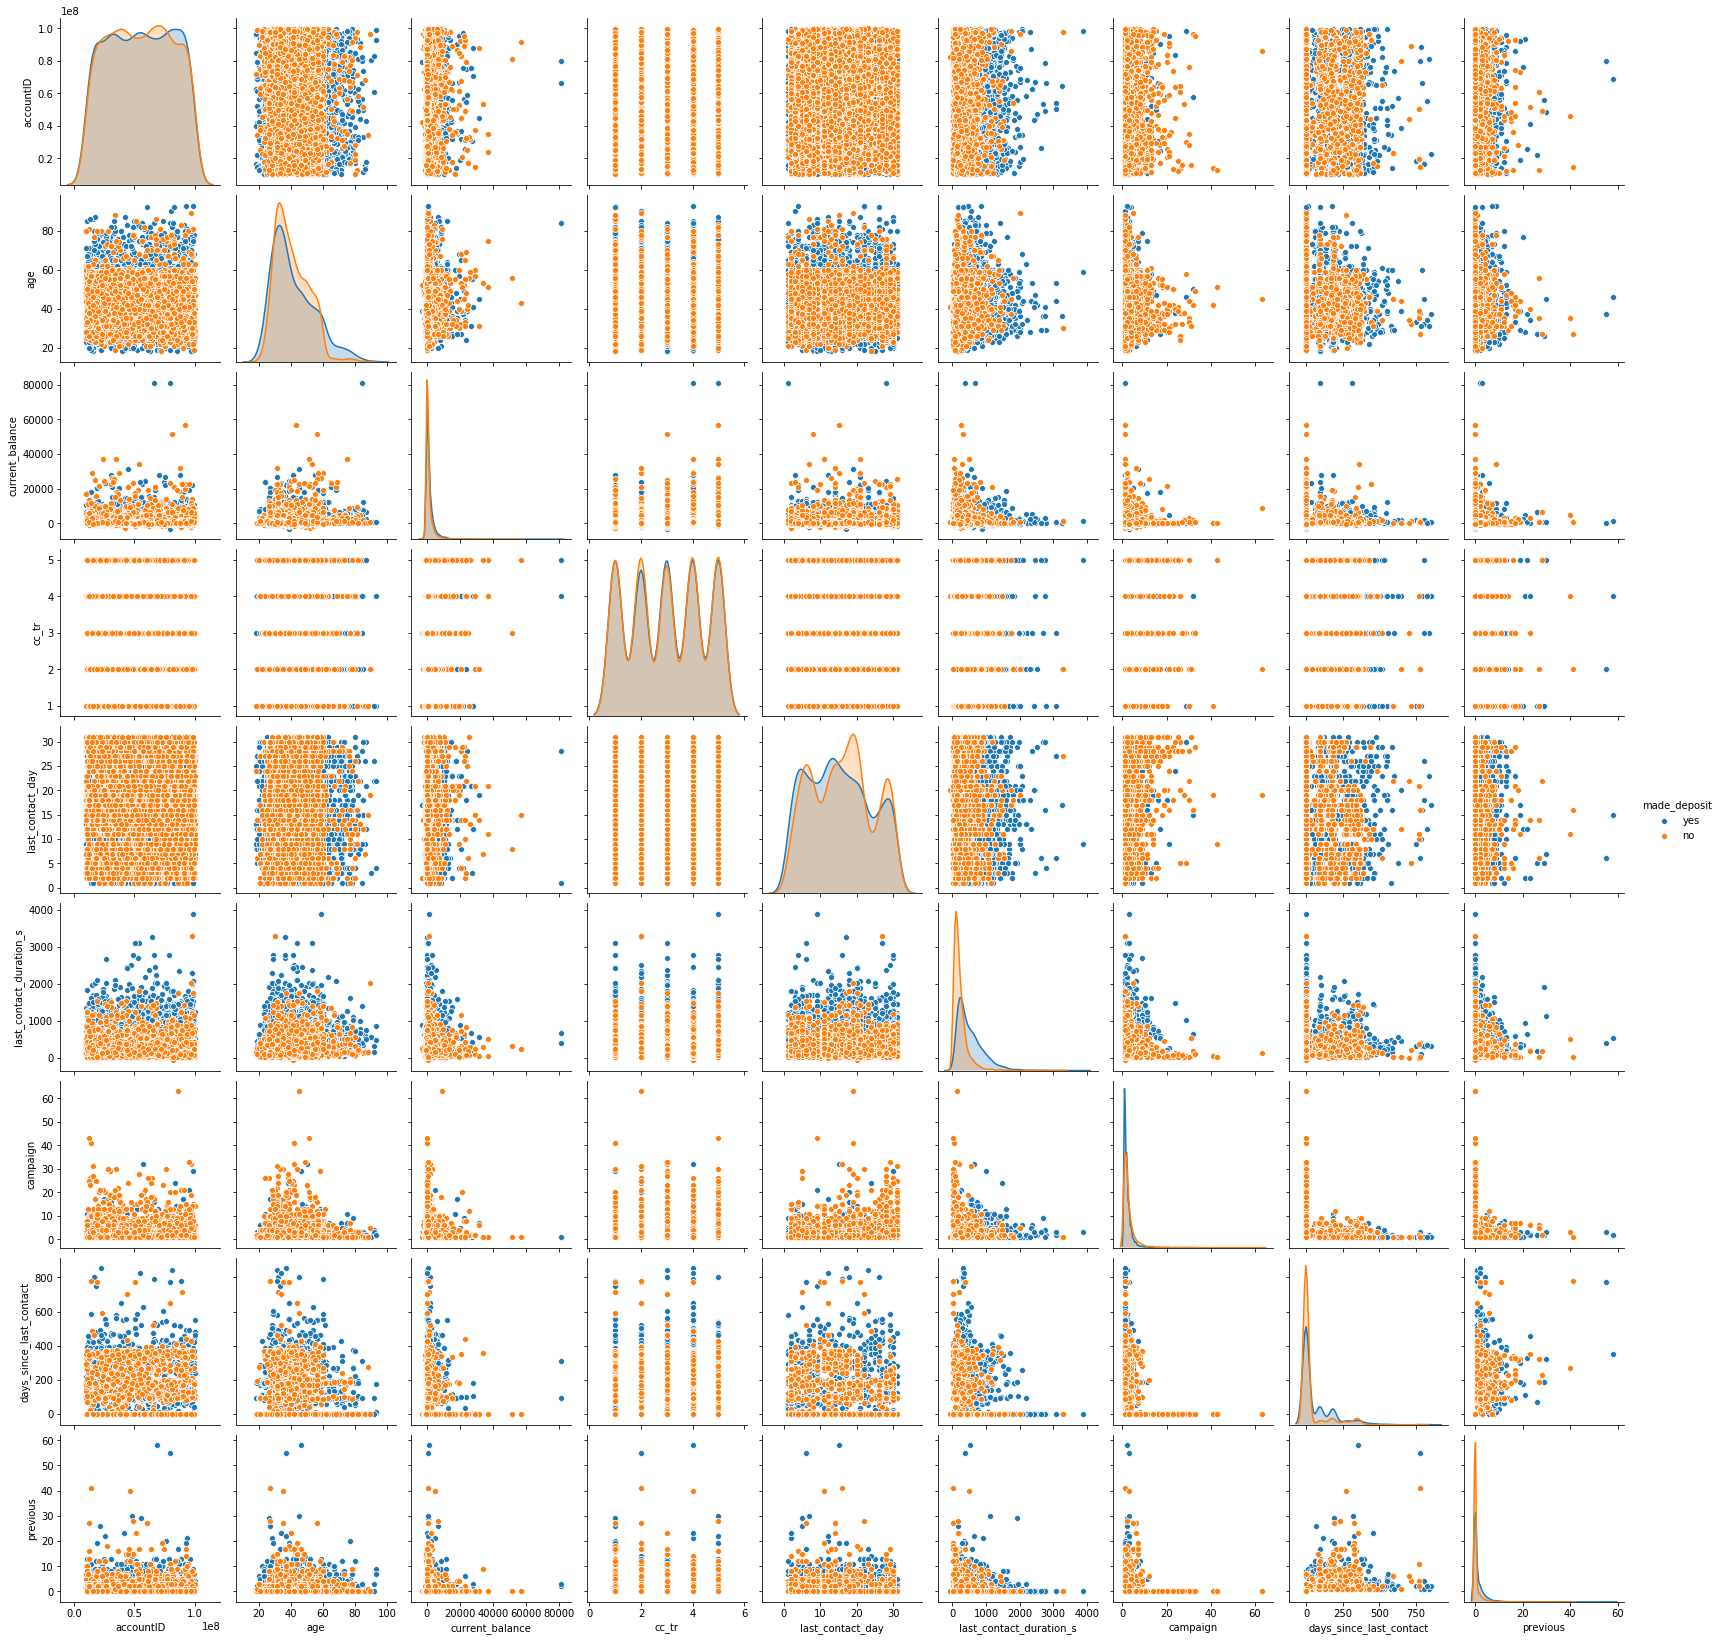

In [22]:
# Using seaborn library for data visualisation with pairs plot 
# All numerical variables' plots are shown, grouped by the feature of interest - dependent variable ('made_deposit')

sns.pairplot(df, hue="made_deposit");

### Categorical Variables (Values and Visualisation) 

This will reveal data entry errors and they will be fixed in the Data Preparation section of the notebook

In [23]:
df['town'].value_counts()

London        472
Birmingham    353
Glasgow       335
Bristol       260
Liverpool     233
             ... 
Dundee         52
Crawley        52
Aberdeen       52
Exeter         50
Bradford       46
Name: town, Length: 101, dtype: int64

In [24]:
# We see branches operating not only in UK but also in France, Germany ...
df['country'].value_counts()

UK          7995
France         2
Germany        1
USA            1
Portugal       1
Name: country, dtype: int64

In [25]:
df['job'].value_counts()

management       1824
blue-collar      1348
technician       1292
admin.            979
services          666
retired           562
self-employed     292
student           277
unemployed        259
entrepreneur      248
housemaid         199
unknown            54
Name: job, dtype: int64

Text(0, 0.5, 'Jobs')

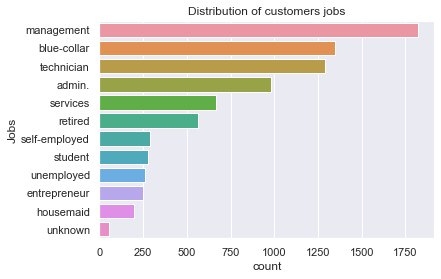

In [26]:
# Visualising the 'job' categories of the customers

sns.set(style="darkgrid")

ax = sns.countplot(y="job", data=df, order=['management', 'blue-collar', 'technician', 'admin.', 'services', 'retired', 'self-employed', 'student', 'unemployed', 'entrepreneur', 'housemaid', 'unknown'])
ax.set_title('Distribution of customers jobs')
ax.set_ylabel('Jobs')

In [52]:
df.groupby(['job'])['made_deposit'].value_counts(normalize=True)

job            made_deposit
admin.         no             0.506
               yes            0.494
blue-collar    no             0.636
               yes            0.364
entrepreneur   no             0.649
               yes            0.351
housemaid      no             0.613
               yes            0.387
management     yes            0.507
               no             0.493
retired        yes            0.673
               no             0.327
self-employed  no             0.534
               yes            0.466
services       no             0.598
               yes            0.402
student        yes            0.747
               no             0.253
technician     no             0.531
               yes            0.469
unemployed     yes            0.552
               no             0.448
unknown        no             0.519
               yes            0.481
Name: made_deposit, dtype: float64

Text(0, 0.5, 'Jobs')

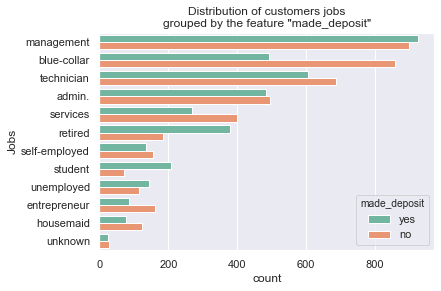

In [53]:
# Visualising the 'job' categories of the customers grouped by made_deposit

sns.set(style="darkgrid")

ax = sns.countplot(y="job", hue="made_deposit", data=df, palette="Set2", order=['management', 'blue-collar', 'technician', 'admin.', 'services', 'retired', 'self-employed', 'student', 'unemployed', 'entrepreneur', 'housemaid', 'unknown'])
ax.set_title('Distribution of customers jobs\ngrouped by the feature "made_deposit"')
ax.set_ylabel('Jobs')

Or, visualising the 'job' categories of the customers using a Pie Chart.

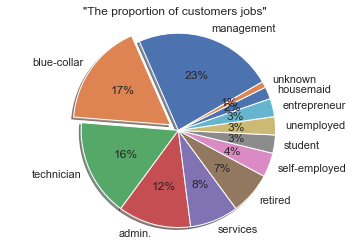

In [54]:
# Pie chart, where the slices will be ordered and plotted counter-clockwise:

labels = 'management', 'blue-collar', 'technician', 'admin.', 'services', 'retired', 'self-employed', 'student', 'unemployed', 'entrepreneur', 'housemaid', 'unknown'
sizes = [23, 17, 16, 12, 8, 7, 4, 3, 3, 3, 2, 1]
explode = (0, 0.1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0)  # only "explode" the 2nd slice (i.e. 'blue-collar')

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.0f%%', frame=False,
        shadow=True, startangle=30)  #radius=30
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.title('"The proportion of customers jobs"')
plt.show()

In [55]:
df['married'].value_counts()

married     4557
single      2559
divorced     884
Name: married, dtype: int64

Text(0, 0.5, 'Marital status')

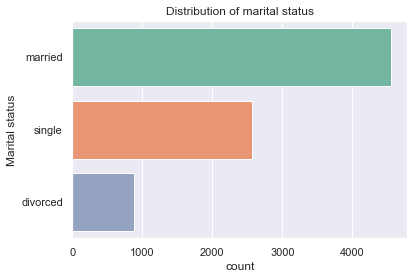

In [56]:
# Visualising the marital status of the customers

sns.set(style="darkgrid")

ax = sns.countplot(y="married", data=df, palette="Set2", order=['married', 'single', 'divorced'])
ax.set_title("Distribution of marital status")
ax.set_ylabel('Marital status')

Text(0, 0.5, 'Marital Status')

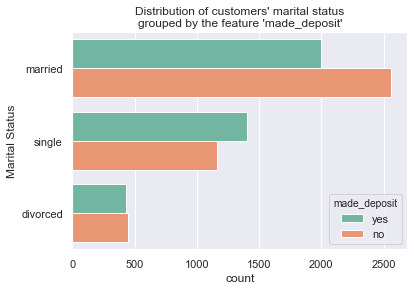

In [57]:
# Visualising the marital status of the customers grouped by made_deposit
sns.set(style="darkgrid")

ax = sns.countplot(y="married", hue="made_deposit", data=df, palette="Set2", order=['married', 'single', 'divorced'])
ax.set_title("Distribution of customers' marital status\ngrouped by the feature 'made_deposit'")
ax.set_ylabel('Marital Status')

In [58]:
df['education'].value_counts()

secondary    3888
tertiary     2653
primary      1088
unknown       371
Name: education, dtype: int64

Text(0, 0.5, 'Education')

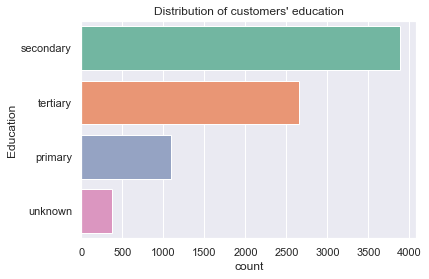

In [32]:
# Visualising the 'education' of the customers

sns.set(style="darkgrid")

ax = sns.countplot(y="education", data=df, palette="Set2", order=['secondary', 'tertiary', 'primary', 'unknown'])
ax.set_title("Distribution of customers' education")
ax.set_ylabel('Education')

In [59]:
df.groupby(['education'])['made_deposit'].value_counts(normalize=True)

education  made_deposit
primary    no             0.587
           yes            0.413
secondary  no             0.547
           yes            0.453
tertiary   yes            0.541
           no             0.459
unknown    no             0.504
           yes            0.496
Name: made_deposit, dtype: float64

Text(0, 0.5, 'Education')

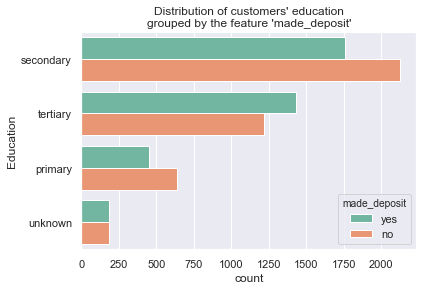

In [60]:
# Visualising the 'education' of the customers grouped by made_deposit

sns.set(style="darkgrid")

ax = sns.countplot(y="education", hue="made_deposit", data=df, palette="Set2", order=['secondary', 'tertiary', 'primary', 'unknown'])
ax.set_title("Distribution of customers' education\ngrouped by the feature 'made_deposit'")
ax.set_ylabel('Education')

In [61]:
df['defaulted?'].value_counts()

no     7880
yes     120
Name: defaulted?, dtype: int64

Text(0, 0.5, 'Default status')

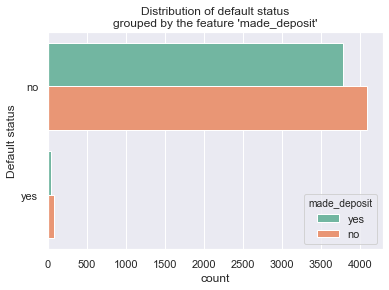

In [62]:
# Visualisation of the 'defaulted?'' status of the customers grouped by made_deposit 

sns.set(style="darkgrid")

ax = sns.countplot(y="defaulted?", hue="made_deposit", data=df, palette="Set2", order=['no', 'yes'])
ax.set_title("Distribution of default status\ngrouped by the feature 'made_deposit'")
ax.set_ylabel('Default status')

In [63]:
df['housing'].value_counts()

no     4227
yes    3773
Name: housing, dtype: int64

In [64]:
df['has_loan'].value_counts()

no     6964
yes    1031
n         5
Name: has_loan, dtype: int64

In [65]:
df['last_contact'].value_counts()

cellular     5740
unknown      1693
telephone     565
cell            2
Name: last_contact, dtype: int64

In [66]:
df['last_contact_month'].value_counts()

may    2037
jul    1087
aug    1064
jun     863
nov     669
apr     660
feb     552
oct     302
jan     255
sep     240
mar     194
dec      76
j         1
Name: last_contact_month, dtype: int64

In [67]:
df['poutcome'].value_counts()

unknown    5960
failure     888
success     775
other       377
Name: poutcome, dtype: int64

## Data Preparation

I will transform some of the variables fixing the data entry errors that have been revealed previously.

##### last_contact_month

In [68]:
# Replacing 'j' with the most frequent value between the months that start from j

df['last_contact_month'].replace('j', 'jul', inplace=True)

In [69]:
df.groupby(['last_contact_month'])['made_deposit'].value_counts(normalize=True)

last_contact_month  made_deposit
apr                 yes            0.641
                    no             0.359
aug                 no             0.550
                    yes            0.450
dec                 yes            0.934
                    no             0.066
feb                 yes            0.591
                    no             0.409
jan                 no             0.584
                    yes            0.416
jul                 no             0.588
                    yes            0.412
jun                 no             0.547
                    yes            0.453
mar                 yes            0.907
                    no             0.093
may                 no             0.668
                    yes            0.332
nov                 no             0.575
                    yes            0.425
oct                 yes            0.818
                    no             0.182
sep                 yes            0.838
                    no  

##### has_loan

In [70]:
# Replacing all n with no ; 'has_loan'

df['has_loan'].replace('n', 'no', inplace=True)

In [71]:
df.groupby(['has_loan'])['made_deposit'].value_counts(normalize=True)

has_loan  made_deposit
no        no             0.500
          yes            0.500
yes       no             0.666
          yes            0.334
Name: made_deposit, dtype: float64

Text(0, 0.5, 'Personal Loan Status')

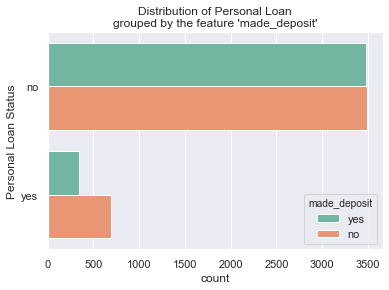

In [72]:
# Visualisation of the 'has_loan' (meaning personal loan) status of the customers grouped by made_deposit after transformation

sns.set(style="darkgrid")

ax = sns.countplot(y="has_loan", hue="made_deposit", data=df, palette="Set2", order=['no', 'yes'])
ax.set_title("Distribution of Personal Loan\ngrouped by the feature 'made_deposit'")
ax.set_ylabel('Personal Loan Status')

#### last_contact_duration_s

The min value of 'last_contact_duration_s' is -60 seconds (refer to descriptive statistics table). It doesn't make sense to have a negative value as count of the seconds. This will be replaced with 60.

In [73]:
# Replacing '-60 ' with 60,assume that is 60, instead of the mean which is; : 373.484375

df['last_contact_duration_s'].replace(-60, 60, inplace=True)

In [75]:
print("The min last_contact_duration_s value is:", df['last_contact_duration_s'].min())

The min last_contact_duration_s value is: 2


#### days_since_last_contact

In [76]:
# Replacing '-1 ' with 1. Assuming that is 1, instead of the mean which is equal to 373.484

df['days_since_last_contact'].replace(-1, 1, inplace=True)

In [77]:
print("min days_since_last_contact value:", df['days_since_last_contact'].min())

min days_since_last_contact value: 1


#### last_contact

In [78]:
# Replacing 'cell' with 'cellular' (most frequaent value)
df['last_contact'].replace( 'cell', 'cellular', inplace=True)

In [79]:
df.groupby(['last_contact'])['made_deposit'].value_counts(normalize=True)

last_contact  made_deposit
cellular      yes            0.548
              no             0.452
telephone     yes            0.503
              no             0.497
unknown       no             0.765
              yes            0.235
Name: made_deposit, dtype: float64

### Visualisation after the Transformation of some of the Variables

This will include Pairs Plot of two numerical variables (which have been transformed - corrected data entry errors) and Box Plots.

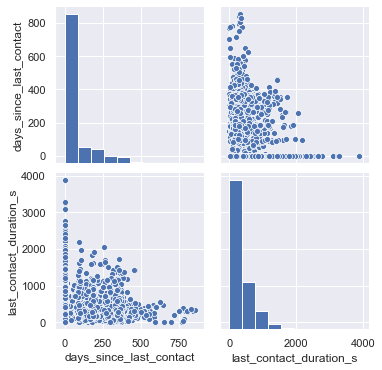

In [80]:
# Pairs plot of two numerical variables after correcting data entry errors

num_feat_after_trans = df[['days_since_last_contact', 'last_contact_duration_s']]
sns.pairplot(num_feat_after_trans);

### Outliers

Looking for outliers with the help of boxplots

Text(0.5, 1.0, 'Last contact duration in secons')

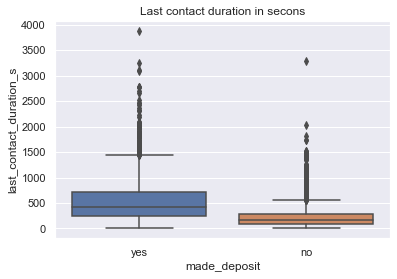

In [88]:
sns.boxplot(x="made_deposit", y="last_contact_duration_s", data=df).set_title('Last contact duration in secons') 

Text(0.5, 1.0, 'Days since last contact')

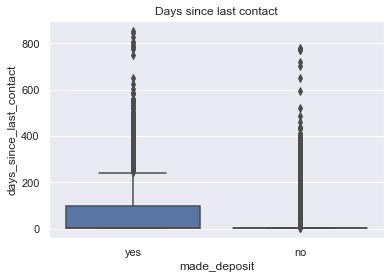

In [89]:
sns.boxplot(x="made_deposit", y="days_since_last_contact", data=df).set_title('Days since last contact')

Text(0.5, 1.0, 'Number of contacts performed\nbefore this campaign')

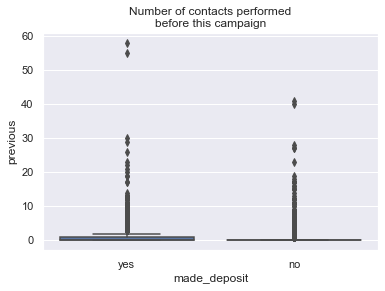

In [90]:
sns.boxplot(x="made_deposit", y="previous", data=df).set_title('Number of contacts performed\nbefore this campaign')

Text(0.5, 1.0, 'Number of contacts performed\nduring this campaign')

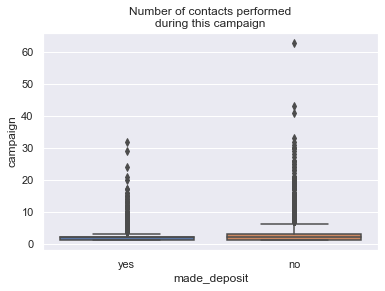

In [91]:
sns.boxplot(x="made_deposit", y="campaign", data=df).set_title('Number of contacts performed\nduring this campaign') 

Text(0.5, 1.0, 'Customers’s age in years')

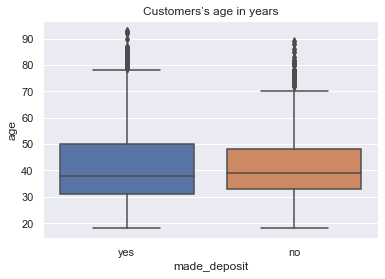

In [92]:
sns.boxplot(x="made_deposit", y="age", data=df).set_title("Customers’s age in years") 

Text(0.5, 1.0, "Outstanding balance of client's\ncash in the bank ")

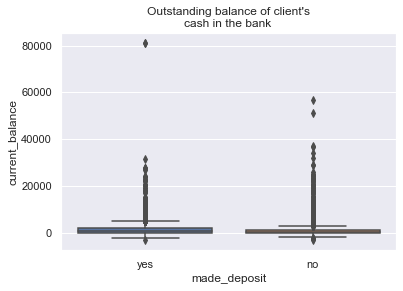

In [93]:
sns.boxplot(x="made_deposit", y="current_balance", data=df).set_title("Outstanding balance of client's\ncash in the bank ") 

## Handling Categorical Attributes: Converting categorical attributes into numerical 

Part of the Data Preparation entails also the transormation of the categorical variables into numericals so they can be of use in Modelling 

In [97]:
df['has_loan'].replace(to_replace=['no','yes'], value=[0,1],inplace=True)

In [98]:
df['defaulted?'].replace(to_replace=['no','yes'], value=[0,1],inplace=True)

In [99]:
df['housing'].replace(to_replace=['no','yes'], value=[0,1],inplace=True)

In [101]:
df['made_deposit'].replace(to_replace=['no','yes'], value=[0,1],inplace=True)
df.head()

,accountID,town,country,age,job,married,education,defaulted?,current_balance,housing,...,last_contact,cc_tr,last_contact_day,last_contact_month,last_contact_duration_s,campaign,days_since_last_contact,previous,poutcome,made_deposit
0,24634684,Crawley,UK,39,management,married,tertiary,0,-190,0,...,unknown,1,11,jun,893,8,1,0,unknown,1
1,80795929,Southend-on-Sea,UK,53,housemaid,married,primary,0,362,0,...,cellular,1,28,jul,1169,2,1,0,unknown,1
2,30786087,Gillingham,UK,79,retired,divorced,primary,0,2787,0,...,telephone,5,13,jul,617,1,377,1,success,1
3,38925327,Gateshead,UK,43,services,single,secondary,0,550,1,...,cellular,4,13,may,107,2,1,0,unknown,0
4,30560733,Eastbourne,UK,35,technician,single,secondary,0,344,0,...,cellular,2,27,aug,519,16,1,0,unknown,1


Next, I drop the feature columns which they will not be used in the next steps. 

These are: accountID, town, country, last_contact, cc_tr, last_contact_day

In [102]:
df.drop(['accountID'], axis = 1,inplace=True)

In [103]:
df.drop(['town'], axis = 1,inplace=True)

In [104]:
df.drop(['country'], axis = 1,inplace=True)

In [105]:
df.drop(['last_contact'], axis = 1,inplace=True)

In [106]:
df.drop(['cc_tr'], axis = 1,inplace=True)

In [107]:
df.drop(['last_contact_day'], axis = 1,inplace=True)

In [111]:
df.drop(['poutcome'], axis = 1,inplace=True) #75% of the observations of the feature ‘poutcome’ is unknown

In [112]:
df.shape

(8000, 14)

In [113]:
df.columns

Index(['age', 'job', 'married', 'education', 'defaulted?', 'current_balance',
       'housing', 'has_loan', 'last_contact_month', 'last_contact_duration_s',
       'campaign', 'days_since_last_contact', 'previous', 'made_deposit'],
      dtype='object')

In [114]:
df.head()

,age,job,married,education,defaulted?,current_balance,housing,has_loan,last_contact_month,last_contact_duration_s,campaign,days_since_last_contact,previous,made_deposit
0,39,management,married,tertiary,0,-190,0,1,jun,893,8,1,0,1
1,53,housemaid,married,primary,0,362,0,0,jul,1169,2,1,0,1
2,79,retired,divorced,primary,0,2787,0,0,jul,617,1,377,1,1
3,43,services,single,secondary,0,550,1,0,may,107,2,1,0,0
4,35,technician,single,secondary,0,344,0,0,aug,519,16,1,0,1


### Encode to 0,1 all of the remaining categorical variables - One hot encoding

This last transformation - One hot encoding - will lead us to the variable selection

In [116]:
df = pd.get_dummies(df, prefix_sep='_', drop_first=True)

In [117]:
df.shape

(8000, 37)

In [118]:
corr_matrix_trans = df.corr()
corr_matrix_trans

,age,defaulted?,current_balance,housing,has_loan,last_contact_duration_s,campaign,days_since_last_contact,previous,made_deposit,...,last_contact_month_dec,last_contact_month_feb,last_contact_month_jan,last_contact_month_jul,last_contact_month_jun,last_contact_month_mar,last_contact_month_may,last_contact_month_nov,last_contact_month_oct,last_contact_month_sep
age,1.000,-0.003,0.118,-0.168,-0.029,0.006,-0.016,0.007,0.022,0.042,...,0.055,0.010,0.013,-0.002,0.014,0.030,-0.128,0.025,0.079,0.042
defaulted?,-0.003,1.000,-0.059,0.005,0.085,-0.010,0.027,-0.035,-0.032,-0.044,...,-0.012,-0.021,0.001,0.062,0.017,-0.019,-0.006,0.007,-0.024,-0.016
current_balance,0.118,-0.059,1.000,-0.083,-0.083,0.022,-0.010,0.023,0.033,0.078,...,0.046,0.007,-0.024,-0.057,0.007,0.016,-0.064,0.081,0.033,0.024
housing,-0.168,0.005,-0.083,1.000,0.078,0.028,0.008,0.063,0.004,-0.208,...,-0.059,-0.084,-0.080,-0.032,-0.069,-0.074,0.424,0.016,-0.103,-0.091
has_loan,-0.029,0.085,-0.083,0.078,1.000,-0.013,0.041,-0.034,-0.017,-0.112,...,-0.030,-0.013,0.002,0.167,-0.022,-0.036,0.005,0.017,-0.037,-0.046
last_contact_duration_s,0.006,-0.010,0.022,0.028,-0.013,1.000,-0.046,-0.033,-0.023,0.447,...,0.010,-0.010,-0.001,0.052,-0.013,-0.043,0.010,-0.010,-0.009,-0.004
campaign,-0.016,0.027,-0.010,0.008,0.041,-0.046,1.000,-0.102,-0.045,-0.131,...,-0.014,-0.031,-0.052,0.106,0.039,-0.024,-0.034,-0.075,-0.071,-0.052
days_since_last_contact,0.007,-0.035,0.023,0.063,-0.034,-0.033,-0.102,1.000,0.506,0.147,...,0.050,0.051,0.022,-0.098,-0.088,0.021,0.019,-0.022,0.075,0.113
previous,0.022,-0.032,0.033,0.004,-0.017,-0.023,-0.045,0.506,1.000,0.137,...,0.054,0.052,0.035,-0.075,-0.046,0.035,-0.028,0.008,0.042,0.094
made_deposit,0.042,-0.044,0.078,-0.208,-0.112,0.447,-0.131,0.147,0.137,1.000,...,0.089,0.061,-0.023,-0.053,-0.018,0.135,-0.172,-0.033,0.135,0.126


The next cell will give the correlation between the dependent/target variable and each potential predictor (all remaining variables in the dataset) 

In [120]:
corr_matrix_trans["made_deposit"].sort_values(ascending=False)

made_deposit               1.000
last_contact_duration_s    0.447
days_since_last_contact    0.147
previous                   0.137
last_contact_month_mar     0.135
last_contact_month_oct     0.135
last_contact_month_sep     0.126
job_retired                0.107
job_student                0.102
married_single             0.094
last_contact_month_dec     0.089
education_tertiary         0.088
current_balance            0.078
last_contact_month_feb     0.061
age                        0.042
job_management             0.031
job_unemployed             0.027
education_unknown          0.008
job_unknown                0.000
job_self-employed         -0.005
job_technician            -0.008
last_contact_month_jun    -0.018
last_contact_month_aug    -0.022
last_contact_month_jan    -0.023
job_housemaid             -0.029
last_contact_month_nov    -0.033
defaulted?                -0.044
job_entrepreneur          -0.046
job_services              -0.046
education_secondary       -0.050
last_conta

## Normalize Data - Feature Scaling

One of the most important transformation to apply in the dataset is feature scaling because of the different qualities of the indicators. Standardization is the process I followed, the values will have a zero mean and unit variance.

In [121]:
targetName="made_deposit"
df.columns.get_loc(targetName)
featureNames=df.columns[np.where(df.columns != targetName)]
X = df[featureNames].values
y = df[targetName].values.ravel()

In [122]:
from sklearn import preprocessing

In [123]:
X= preprocessing.StandardScaler().fit(X).transform(X)
X[0:5]

array([[-0.18474671, -0.12340351, -0.53862006, -0.94477258,  2.59989554,
         1.48649391,  1.98661796, -0.48014277, -0.35441529, -0.45016199,
        -0.17886236, -0.15971709,  1.84009916, -0.27487806, -0.19463484,
        -0.30134685, -0.18938556, -0.43886882, -0.18291585, -0.08243708,
         0.86921857, -0.68579731, -0.97238125,  1.41966693, -0.22052262,
        -0.39166636, -0.09793424, -0.2722386 , -0.18145101, -0.39674602,
         2.87575875, -0.15764732, -0.58447119, -0.30208659, -0.19806809,
        -0.17586311],
       [ 0.98466842, -0.12340351, -0.36439522, -0.94477258, -0.38463084,
         2.27623755, -0.17946936, -0.48014277, -0.35441529, -0.45016199,
        -0.17886236,  6.2610706 , -0.54344897, -0.27487806, -0.19463484,
        -0.30134685, -0.18938556, -0.43886882, -0.18291585, -0.08243708,
         0.86921857, -0.68579731, -0.97238125, -0.70439057, -0.22052262,
        -0.39166636, -0.09793424, -0.2722386 , -0.18145101,  2.52050415,
        -0.34773431, -0.15764

# Optimal Variable Set

Wrapper feature selection and Embedded feature selection will follow. For the output report, I utilize the Embedded feature selection method.

### Variable selection & Feature Selection (some theory)

In addition to all of the technique related decisions, there are choices to be made about the data. Which variables should be included is known as the problem of variable selection and how variables are combined or manipulated to help the algorithm learn the correct task is known as feature selection. Source: "Hands-On Machine Learning with Scikit-Learn & TensorFlow", Aurélien Géron, O'Reilly.

### Wrapper feature selection 

A wrapper approach treats feature selection as a search process. We build a model with one set of features selected, then repeat with different sets of features, using the accuracy of the model to guide the search and always keeping the best feature set found so far.

Recursive Feature Elimination (or RFE) is one such approach. It works by starting with all features selected, then recursively removing features and building a model on those attributes that remain. The feature to be removed at each iteration is chosen using coefficients or importances from the model - so with RFE there is an element of an embedded approach too (not all wrapper approaches need to do this).

You can learn more about RFE [here](http://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.RFE.html#sklearn.feature_selection.RFE). Source: University of Stirling, Data Analytics module.

In [124]:
# Import your necessary dependencies
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

# load example data set
#X, y = load_iris(return_X_y=True)
print("Original shape: " + str(X.shape))

# Feature selection
# Construct a model and pass it to the RFE function, which will iterate until the
# specified number of features are selected
lgr_model = LogisticRegression(solver="lbfgs", multi_class="auto", max_iter=1000)
rfe = RFE(lgr_model, 7)
fit = rfe.fit(X, y)

print("Number of features selected: " + str(fit.n_features_))
print("Selected Features: " + str(fit.support_))

# use a numpy array as that can be filtered by a list of booleans
print("Selected Feature Names: " + str(np.array(featureNames)[fit.support_]))

Original shape: (8000, 36)
Number of features selected: 7
Selected Features: [False False False  True False  True  True  True  True False False False
 False False False False False False False False False False False False
 False False False False False False False  True False False  True False]
Selected Feature Names: ['housing' 'last_contact_duration_s' 'campaign' 'days_since_last_contact'
 'previous' 'last_contact_month_mar' 'last_contact_month_oct']


### Embedded feature selection

Many models can be inspected to assign an importance to each feature. For example, tree based learners place the model important feature near the root of the tree, with less important features near the leaves. These importances can provide useful insights and can also be used, with a threshold, to select features.

I will now try a simple worked example using the `ExtraTreesClassifier` model. You can read more about this example [here](https://scikit-learn.org/stable/auto_examples/ensemble/plot_forest_importances.html#sphx-glr-auto-examples-ensemble-plot-forest-importances-py).

The model; a tree-based regression model; `ExtraTreesRegressor` is a good one to try. The next cell wil reveal what are the most important features for predicting 'made_deposit' subscription (Embedded feature selection). Source: University of Stirling, Data Analytics module.

Original shape: (8000, 36)
Importances: [0.0953049  0.00349806 0.09648106 0.03703422 0.01708778 0.30089838
 0.06669253 0.05097245 0.04269213 0.01086278 0.00609658 0.00523223
 0.01241622 0.00874639 0.00688191 0.00864548 0.00762297 0.01476698
 0.00699715 0.00179434 0.0151294  0.0127537  0.01629557 0.01347059
 0.0078073  0.01464524 0.00491946 0.00974169 0.00834553 0.01209065
 0.01124016 0.01517039 0.02058923 0.01009637 0.01522157 0.01175861]
Updated shape: (8000, 7)
Ranks: 
job_unknown               0.002
defaulted?                0.003
last_contact_month_dec    0.005
job_housemaid             0.005
job_entrepreneur          0.006
job_self-employed         0.007
job_unemployed            0.007
job_student               0.008
education_unknown         0.008
last_contact_month_jan    0.008
job_services              0.009
job_retired               0.009
last_contact_month_feb    0.010
last_contact_month_nov    0.010
job_blue-collar           0.011
last_contact_month_jun    0.011
last_contact

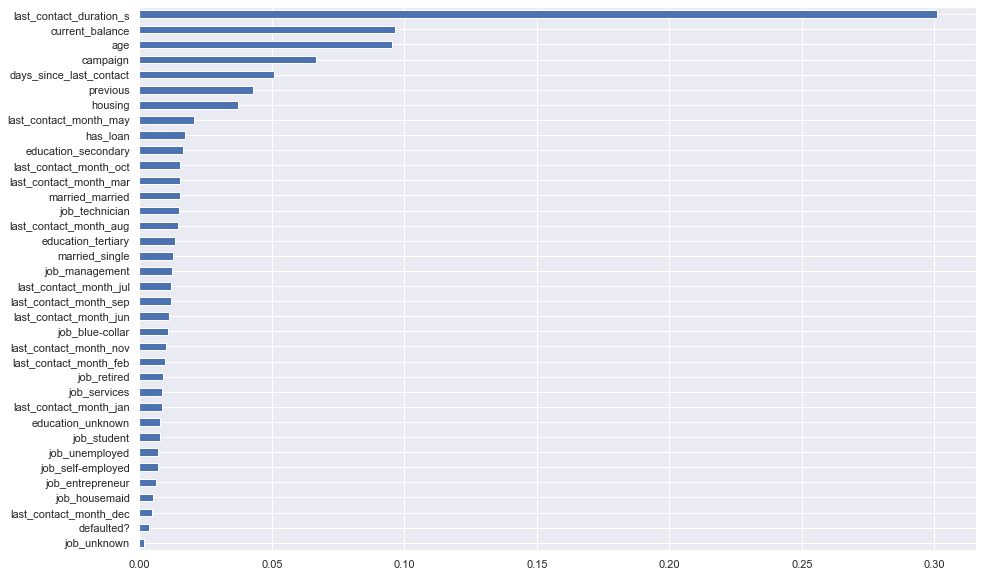

In [125]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import SelectFromModel


#X, y defined previously in feature scaling
print("Original shape: " + str(X.shape))

# fit a tree-based model to the data
et_model = ExtraTreesClassifier(n_estimators=50)
et_model = et_model.fit(X, y)

# extract feature importances
feat_importances = et_model.feature_importances_  
print("Importances: " + str(feat_importances))

# this is how the importances are used to select the features in the data
# in this case, it will use the mean importance as a threshold for selection
model = SelectFromModel(et_model, prefit=True)
X_new = model.transform(X)
print("Updated shape: " + str(X_new.shape))

# I plot the importances graphically...
# for this we match the importances with the names of the features
# in a pandas series
feat_ranks = pd.Series(feat_importances, index=featureNames)
feat_ranks.sort_values(inplace=True)
print("Ranks: ")
print(feat_ranks) # as text
plot=feat_ranks.plot(kind="barh", figsize=(15,10)) # as plot

### Variables selected

In [127]:
Feature = df[['last_contact_duration_s','days_since_last_contact','previous','campaign', 'housing', 'age', 'current_balance']]

In [128]:
X = Feature
X[0:5]

,last_contact_duration_s,days_since_last_contact,previous,campaign,housing,age,current_balance
0,893,1,0,8,0,39,-190
1,1169,1,0,2,0,53,362
2,617,377,1,1,0,79,2787
3,107,1,0,2,1,43,550
4,519,1,0,16,0,35,344


In [129]:
X = np.asarray(df[['last_contact_duration_s','days_since_last_contact','previous','campaign', 'housing', 'age', 'current_balance']])
X[0:5]

array([[ 893,    1,    0,    8,    0,   39, -190],
       [1169,    1,    0,    2,    0,   53,  362],
       [ 617,  377,    1,    1,    0,   79, 2787],
       [ 107,    1,    0,    2,    1,   43,  550],
       [ 519,    1,    0,   16,    0,   35,  344]])

In [130]:
y = df['made_deposit'].values
y[0:5]

array([1, 1, 1, 0, 1])

In [131]:
y = np.asarray(df['made_deposit'])
y [0:5]

array([1, 1, 1, 0, 1])

Also, I normalize the dataset (Feature X)

In [134]:
from sklearn import preprocessing
X = preprocessing.StandardScaler().fit(X).transform(X)
X[0:5]

array([[ 1.48649391, -0.48014277, -0.35441529,  1.98661796, -0.94477258,
        -0.18474671, -0.53862006],
       [ 2.27623755, -0.48014277, -0.35441529, -0.17946936, -0.94477258,
         0.98466842, -0.36439522],
       [ 0.69675026,  2.98746598,  0.0673194 , -0.54048391, -0.94477258,
         3.15643938,  0.40099474],
       [-0.76255865, -0.48014277, -0.35441529, -0.17946936,  1.05845579,
         0.1493719 , -0.30505777],
       [ 0.41633404, -0.48014277, -0.35441529,  4.87473439, -0.94477258,
        -0.51886532, -0.37007646]])

## Train Test Split

In [135]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (6400, 7) (6400,)
Test set: (1600, 7) (1600,)


# Modelling

Three ML algorithms will be deployed - Logistic Regression, Decision Tree and Multi Layer Perceptron - MLP

# Logistic Regression 

In [136]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

LR = LogisticRegression(C=0.01, solver='liblinear').fit(X_train,y_train)
LR

LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [137]:
yhat = LR.predict(X_test)
yhat

array([0, 1, 0, ..., 0, 0, 1])

In [138]:
LR.score(X_train, y_train)

0.7659375

### Evaluation using Test set

In [139]:
LR.score(X_test, y_test)

0.77125

#### jaccard index

In [152]:
from sklearn.metrics import jaccard_similarity_score
jaccard_similarity_score(y_test, yhat)

/Users/stella/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:664: FutureWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  FutureWarning)


0.77125

#### log loss

Another way for evaluation is the log loss. In logistic regression, the output can be the probability of customer subscribed the term deposit, i.e. 'made_deposit' equals to 'yes' (or 1). This probability is a value between 0 and 1. Log loss( Logarithmic loss) measures the performance of a classifier where the predicted output is a probability value between 0 and 1.

In [197]:
# 'predict_proba' returns estimates for all classes, ordered by the label of classes. 
# The first column is the probability of class 1, P(Y=1|X), and second column is probability of class 0, P(Y=0|X).

yhat_prob = LR.predict_proba(X_test)
yhat_prob

array([[0.52, 0.48],
       [0.31, 0.69],
       [0.8 , 0.2 ],
       ...,
       [0.51, 0.49],
       [0.56, 0.44],
       [0.18, 0.82]])

In [198]:
from sklearn.metrics import log_loss
log_loss(y_test, yhat_prob)

0.49241617633644025

### Evaluation with vizualisation

Distribution Plots and Confusion Matrix

Importing libraries for ploting

In [158]:
%%capture
! pip install ipywidgets

In [148]:
from IPython.display import display
from IPython.html import widgets 
from IPython.display import display
from ipywidgets import interact, interactive, fixed, interact_manual

/Users/stella/miniconda3/lib/python3.7/site-packages/IPython/html.py:14: ShimWarning: The `IPython.html` package has been deprecated since IPython 4.0. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


Defining the **function** for plotting. This will also be used in the next ML algorithms to generate the distribution plots for every model.

In [149]:
def DistributionPlot(RedFunction, BlueFunction, RedName, BlueName, Title):
    width = 5
    height = 4
    plt.figure(figsize=(width, height))

    ax1 = sns.distplot(RedFunction, hist=False, color="r", label=RedName)
    ax2 = sns.distplot(BlueFunction, hist=False, color="b", label=BlueName, ax=ax1)

    plt.title(Title)
    #plt.xlabel('made_deposit')
    plt.ylabel("Proportion of the Target\nVariable 'made_deposit'")

    plt.show()
    plt.close()

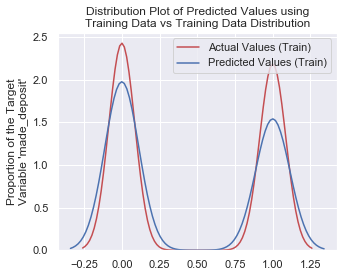

In [150]:
Title = 'Distribution Plot of Predicted Values using\nTraining Data vs Training Data Distribution'
DistributionPlot(y_train, yhat, "Actual Values (Train)", "Predicted Values (Train)", Title)

**Figure 1**: Plot of predicted values using the training data compared to the training data.

So far the model seems to be doing well in learning from the training dataset. But what happens when the model encounters new data from the testing dataset? When the model generates new values from the test data, we see the distribution of the predicted values is not much different from the actual target values.

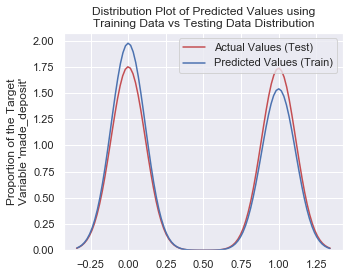

In [151]:
Title = 'Distribution Plot of Predicted Values using\nTraining Data vs Testing Data Distribution'
DistributionPlot(y_test, yhat, "Actual Values (Test)", "Predicted Values (Train)", Title)

**Figure 2**: Plot of predicted values using the training data compared to the testing data.

**Comparing Figure 1 and Figure 2;** It is evident the distribution of the test data in Figure 2 is much better at fitting the data. The figures also show the ranges where the model is not accurate.

#### Overfitting, Underfitting and Model Selection (theory reminder)

It turns out that the test data sometimes referred to as the out of sample data is a much better measure of how well your model performs in the real world. One reason for this is overfitting;

#### Overfitting, Underfitting more...

Overfitting occurs when the model fits the noise, not the underlying process. Therefore when testing the model using the test-set, the model does not perform as well as it is modelling noise, not the underlying process that generated the relationship.

### Confusion matrix
Another way of looking at accuracy of classifier is to look at **confusion matrix**.

Defining the **function** for creating the confusion matrix. This will also be used in the next ML algorithms to generate the confusion matrix for every model.

In [158]:
from sklearn.metrics import classification_report, confusion_matrix
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap= 'RdBu')
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
print(confusion_matrix(y_test, yhat, labels=[0, 1]))

[[668 135]
 [231 566]]


Confusion matrix, without normalization
[[668 135]
 [231 566]]


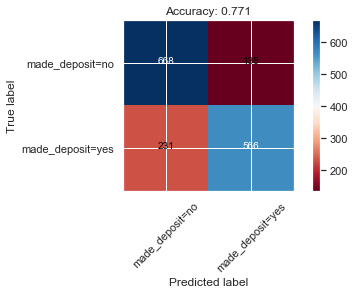

In [160]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, yhat, labels=[0,1])
np.set_printoptions(precision=2)


# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['made_deposit=no','made_deposit=yes'],normalize= False,  title='Accuracy: 0.771')


In [161]:
print (classification_report(y_test, yhat))

              precision    recall  f1-score   support

           0       0.74      0.83      0.78       803
           1       0.81      0.71      0.76       797

    accuracy                           0.77      1600
   macro avg       0.78      0.77      0.77      1600
weighted avg       0.78      0.77      0.77      1600



In [162]:
#f1_score from sklearn library:

from sklearn.metrics import f1_score

f1_score(y_test, yhat, average='weighted') 

0.7703714608118307

# Decision Tree

#### Setting up the Decision Tree


In [163]:
from sklearn.tree import DecisionTreeClassifier

#### Modeling

Firstly I create an instance of the DecisionTreeClassifier called drugTree.
Inside of the classifier, I specify criterion="entropy" so the information gain of each node is visible.

In [164]:
depositTree = DecisionTreeClassifier(criterion="entropy", max_depth = 4)
depositTree # it shows the default parameters

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=4, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

Next, I fit the data with the training feature matrix X_train and training response vector y_train

In [165]:
depositTree.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=4, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

#### Prediction

Predictions on the testing dataset, this is stored into a variable called predTree.

In [166]:
predTree = depositTree.predict(X_test)

In [167]:
print (predTree [0:5])

print (y_test [0:5])

[1 1 0 0 1]
[1 1 0 1 1]


#### Distributions of predictions

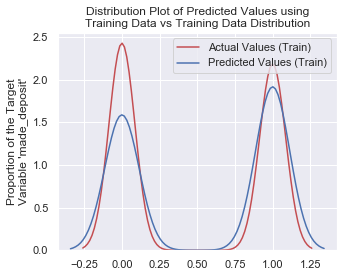

In [168]:
Title = 'Distribution Plot of Predicted Values using\nTraining Data vs Training Data Distribution'
DistributionPlot(y_train, predTree, "Actual Values (Train)", "Predicted Values (Train)", Title)

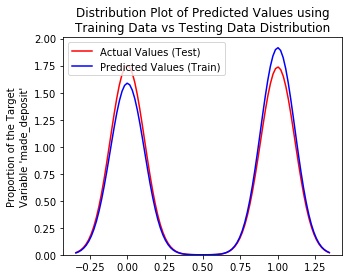

In [344]:
Title = 'Distribution Plot of Predicted Values using\nTraining Data vs Testing Data Distribution'
DistributionPlot(y_test, predTree, "Actual Values (Test)", "Predicted Values (Train)", Title)

#### Evaluation
Next, importing metrics from sklearn and checking the accuracy of the model.

In [170]:
from sklearn import metrics

print("DecisionTrees's Accuracy: ", metrics.accuracy_score(y_test, predTree))

DecisionTrees's Accuracy:  0.78375


*Decision Tree:* accuracy of the built model using various evaluation metrics. **Alternatives for evaluation** as previously have been used (f1_score and jaccard index).

In [171]:
#f1_score from sklearn library
print(f1_score(y_test, predTree, average='weighted'))

#jaccard index for accuracy
print(jaccard_similarity_score(y_test, predTree))

0.7832746389563867
0.78375


/Users/stella/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:664: FutureWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  FutureWarning)


#### Confusion Matrix (Decision Tree)

Confusion matrix, without normalization
[[591 212]
 [134 663]]


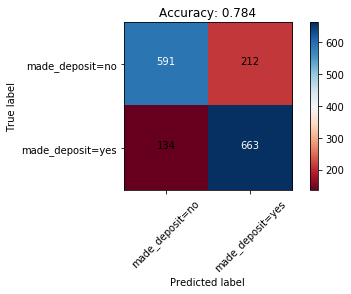

In [289]:
# Compute confusion matrix
cnf_matrix_tree = confusion_matrix(y_test, predTree, labels=[0,1])
np.set_printoptions(precision=2)


# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix_tree, classes=['made_deposit=no','made_deposit=yes'],normalize= False,  title='Accuracy: 0.784')


#### Visualization of the decision tree

In [104]:
# Install the pydotplus and graphviz libraries if have not been installed before
!conda install -c conda-forge pydotplus -y
!conda install -c conda-forge python-graphviz -y

Solving environment: done

## Package Plan ##

  environment location: /Users/stella/miniconda3

  added / updated specs:
    - pydotplus


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    ca-certificates-2020.4.5.1 |       hecc5488_0         146 KB  conda-forge
    cairo-1.16.0               |    h0ab9d94_1001         1.3 MB  conda-forge
    certifi-2020.4.5.1         |   py37hc8dfbb8_0         151 KB  conda-forge
    conda-4.8.3                |   py37hc8dfbb8_1         3.0 MB  conda-forge
    fontconfig-2.13.1          |    h1027ab8_1000         269 KB  conda-forge
    fribidi-1.0.9              |       h0b31af3_0          64 KB  conda-forge
    graphite2-1.3.13           |    h2098e52_1000          84 KB  conda-forge
    graphviz-2.40.1            |       hefbbd9a_2         6.3 MB
    harfbuzz-1.8.8             |       hb8d4a28_0         414 KB
    libtiff-4.0.9              |       h

In [176]:
# Importing libraries for visualizing the tree

from sklearn.externals.six import StringIO
import pydotplus
import matplotlib.image as mpimg
from sklearn import tree
%matplotlib inline 

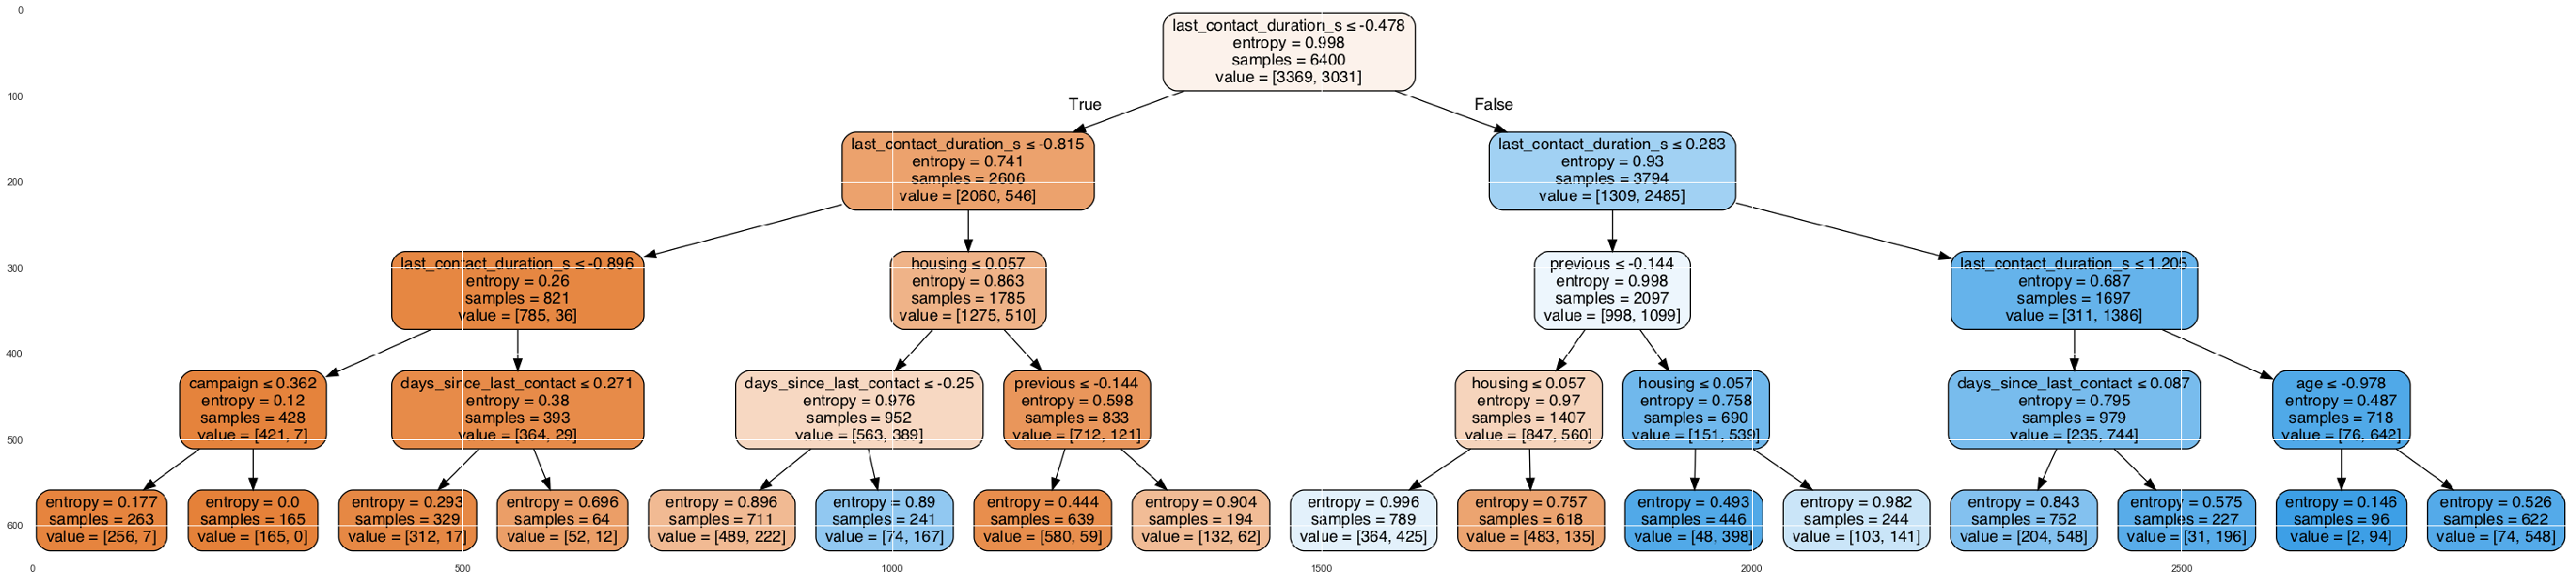

In [178]:
from IPython.display import Image
from sklearn.externals.six import StringIO
from sklearn.tree import export_graphviz
from sklearn.tree import DecisionTreeClassifier


features = ['{}'.format(c) for c in Feature]

# viz
%matplotlib inline
import sklearn
from sklearn.tree import export_graphviz

import seaborn as sns

dot_data = StringIO()  
export_graphviz(depositTree, out_file=dot_data,  
                    feature_names=features,
#                     class_names=tree.classes_,  
                     filled=True, rounded=True,  
                    special_characters=True)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue()) 
Image(graph.create_png())  

graph.write_png(filename)
img = mpimg.imread(filename)
plt.figure(figsize=(50, 100))
plt.imshow(img,interpolation='nearest')

# Multi Layer Perceptron - MLP

In [180]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [181]:
#train_test_split has been performed previously

In [199]:
mlp = MLPClassifier(hidden_layer_sizes=(32, 100), max_iter=500, alpha=0.0001, activation='relu',
                     solver='adam', verbose='True', shuffle=True, random_state=21, tol=0.000000001)

In [200]:
mlp.fit(X_train, y_train)
y_pred = mlp.predict(X_test)

Iteration 1, loss = 0.64285181
Iteration 2, loss = 0.52599395
Iteration 3, loss = 0.48487889
Iteration 4, loss = 0.47021167
Iteration 5, loss = 0.46276034
Iteration 6, loss = 0.45765359
Iteration 7, loss = 0.45365769
Iteration 8, loss = 0.45046180
Iteration 9, loss = 0.44779000
Iteration 10, loss = 0.44653899
Iteration 11, loss = 0.44672768
Iteration 12, loss = 0.44489776
Iteration 13, loss = 0.44339845
Iteration 14, loss = 0.44228164
Iteration 15, loss = 0.44088681
Iteration 16, loss = 0.44007607
Iteration 17, loss = 0.43959260
Iteration 18, loss = 0.43880817
Iteration 19, loss = 0.43838879
Iteration 20, loss = 0.43741449
Iteration 21, loss = 0.43690305
Iteration 22, loss = 0.43646061
Iteration 23, loss = 0.43607488
Iteration 24, loss = 0.43583160
Iteration 25, loss = 0.43476161
Iteration 26, loss = 0.43446433
Iteration 27, loss = 0.43253941
Iteration 28, loss = 0.43344116
Iteration 29, loss = 0.43238718
Iteration 30, loss = 0.43242875
Iteration 31, loss = 0.43073599
Iteration 32, los

In [201]:
accuracy_score(y_test, y_pred)

0.810625

In [204]:
#f1_score from sklearn library
print(f1_score(y_test, y_pred, average='weighted'))

0.8103409210923133


In [205]:
#jaccard index for accuracy
print(jaccard_similarity_score(y_test, y_pred))

0.810625


/Users/stella/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:664: FutureWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  FutureWarning)


#### The loss curve 

Text(0, 0.5, 'Loss')

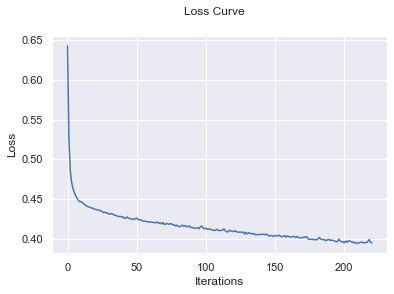

In [202]:
loss_values = mlp.loss_curve_

fig = plt.figure()
plt.plot(loss_values)
fig.suptitle('Loss Curve')
plt.xlabel('Iterations')
plt.ylabel('Loss')


Confusion matrix, without normalization
[[619 184]
 [119 678]]


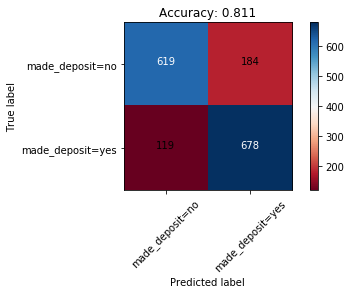

In [322]:
# Compute confusion matrix
cnf_matrix_mlp = confusion_matrix(y_test, y_pred, labels=[0,1])
np.set_printoptions(precision=2)


# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix_mlp, classes=['made_deposit=no','made_deposit=yes'],normalize= False,  title='Accuracy: 0.811')



#### Distribution Plots

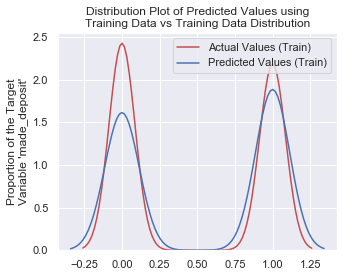

In [188]:
Title = 'Distribution Plot of Predicted Values using\nTraining Data vs Training Data Distribution'
DistributionPlot(y_train, y_pred, "Actual Values (Train)", "Predicted Values (Train)", Title)

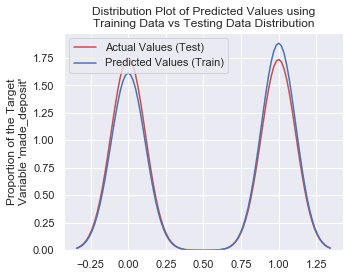

In [189]:
Title = 'Distribution Plot of Predicted Values using\nTraining Data vs Testing Data Distribution'
DistributionPlot(y_test, y_pred, "Actual Values (Test)", "Predicted Values (Train)", Title)

## ROC Curve 

In [190]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

def display_roc(models, x, y):
    
    ns_probs = [0 for _ in range(len(y))]
    ns_fpr, ns_tpr, _ = roc_curve(y, ns_probs)
    plt.plot(ns_fpr, ns_tpr, linestyle='--', label='')
    
    for name, model in models.items():
        
        lr_probs = model.predict_proba(x)
        lr_probs = lr_probs[:, 1]
        ns_auc = roc_auc_score(y, ns_probs)
        lr_auc = roc_auc_score(y, lr_probs)

        print('%s: ROC AUC=%.3f' % (name, lr_auc))
        lr_fpr, lr_tpr, _ = roc_curve(y, lr_probs)
        plt.plot(lr_fpr, lr_tpr, marker='.', label=name)
 
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
 
    plt.legend()
    plt.show()

Logistic Regression: ROC AUC=0.860
Decision Tree: ROC AUC=0.861
MLP: ROC AUC=0.882


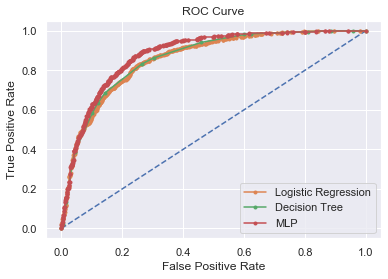

In [203]:
models = {
    'Logistic Regression': LR,
    'Decision Tree': depositTree,
    'MLP': mlp
}

display_roc(models, X_test, y_test)

## Report

Reporting the accuracy of the built models using different evaluation metrics:

| Algorithm          | Jaccard           | F1-score          | LogLoss            |
|--------------------|---------          |----------         |---------           |
| Logistic Regression|0.77125            |0.77037            | 0.492416           |
| Decision Tree      |0.78375            |0.78327            | NA                 |
| MLP                |0.81062            |0.81034            | NA                 |

Visit my Project Repository on GitHub [here](https://github.com/stella-spyrou/Data-Analytics-Project---Classification-with-Python.git)